In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load CSV with explicit column names
columns_to_use = ["Allegiance", "Death No.", "Episode", "Killer", "Killers House", "Location", "Method", "Name", "Season"]
df = pd.read_csv(r"C:\Users\karth\Downloads\Game of Thrones Death.csv", usecols=columns_to_use)

In [8]:
df.head()

,Allegiance,Death No.,Episode,Killer,Killers House,Location,Method,Name,Season
0,Night's Watch,1,1,White Walker,None,Beyond the Wall,Ice sword,Waymar Royce,1
1,Night's Watch,2,1,White Walker,None,Beyond the Wall,Ice sword,Gared,1
2,Night's Watch,3,1,Ned Stark,House Stark,Winterfell,Sword,Will,1
3,None,4,1,Direwolf,None,Winterfell,Teeth,Stag,1
4,None,5,1,Stag,None,Winterfell,Antler,Direwolf,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Allegiance     2224 non-null   object
 1   Death No.      2224 non-null   int64 
 2   Episode        2224 non-null   int64 
 3   Killer         2224 non-null   object
 4   Killers House  2224 non-null   object
 5   Location       2224 non-null   object
 6   Method         2224 non-null   object
 7   Name           2224 non-null   object
 8   Season         2224 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 156.5+ KB


In [10]:
df.describe()

,Death No.,Episode,Season
count,2224.000000,2224.000000,2224.000000
mean,1112.500000,5.959982,6.248201
std,642.157821,2.503927,2.001685
min,1.000000,1.000000,1.000000
25%,556.750000,5.000000,5.000000
50%,1112.500000,5.000000,7.000000
75%,1668.250000,9.000000,8.000000
max,2224.000000,10.000000,8.000000


In [11]:
df.isnull().sum()

Allegiance       0
Death No.        0
Episode          0
Killer           0
Killers House    0
Location         0
Method           0
Name             0
Season           0
dtype: int64

In [12]:
df['Allegiance'].value_counts()

House Lannister                      835
None                                 432
House Stark                          121
Free Folk                            121
Night's Watch                         79
House Bolton                          68
Sons of the Harpy                     68
House Targaryen                       68
House Baratheon of Dragonstone        67
House Frey                            62
Faith Militant                        52
Smallfolk                             44
House Greyjoy                         41
Dothraki                              23
House Baratheon of King's Landing     22
The Masters                           14
The Thirteen                          12
Wise Masters                          12
Brotherhood Without Banners           10
House Mormont                          8
House Martell                          8
Good Masters                           7
House Baelish                          6
Great Masters                          6
Children of the 

In [13]:
df['Killer'].value_counts()

Daenerys Targaryen    1008
Cersei Lannister       199
Arya Stark              68
Wight                   54
Jon Snow                51
                      ... 
Selyse Florent           1
Olenna Tyrell            1
Walder Rivers            1
The Tickler              1
Qyburn                   1
Name: Killer, Length: 129, dtype: int64

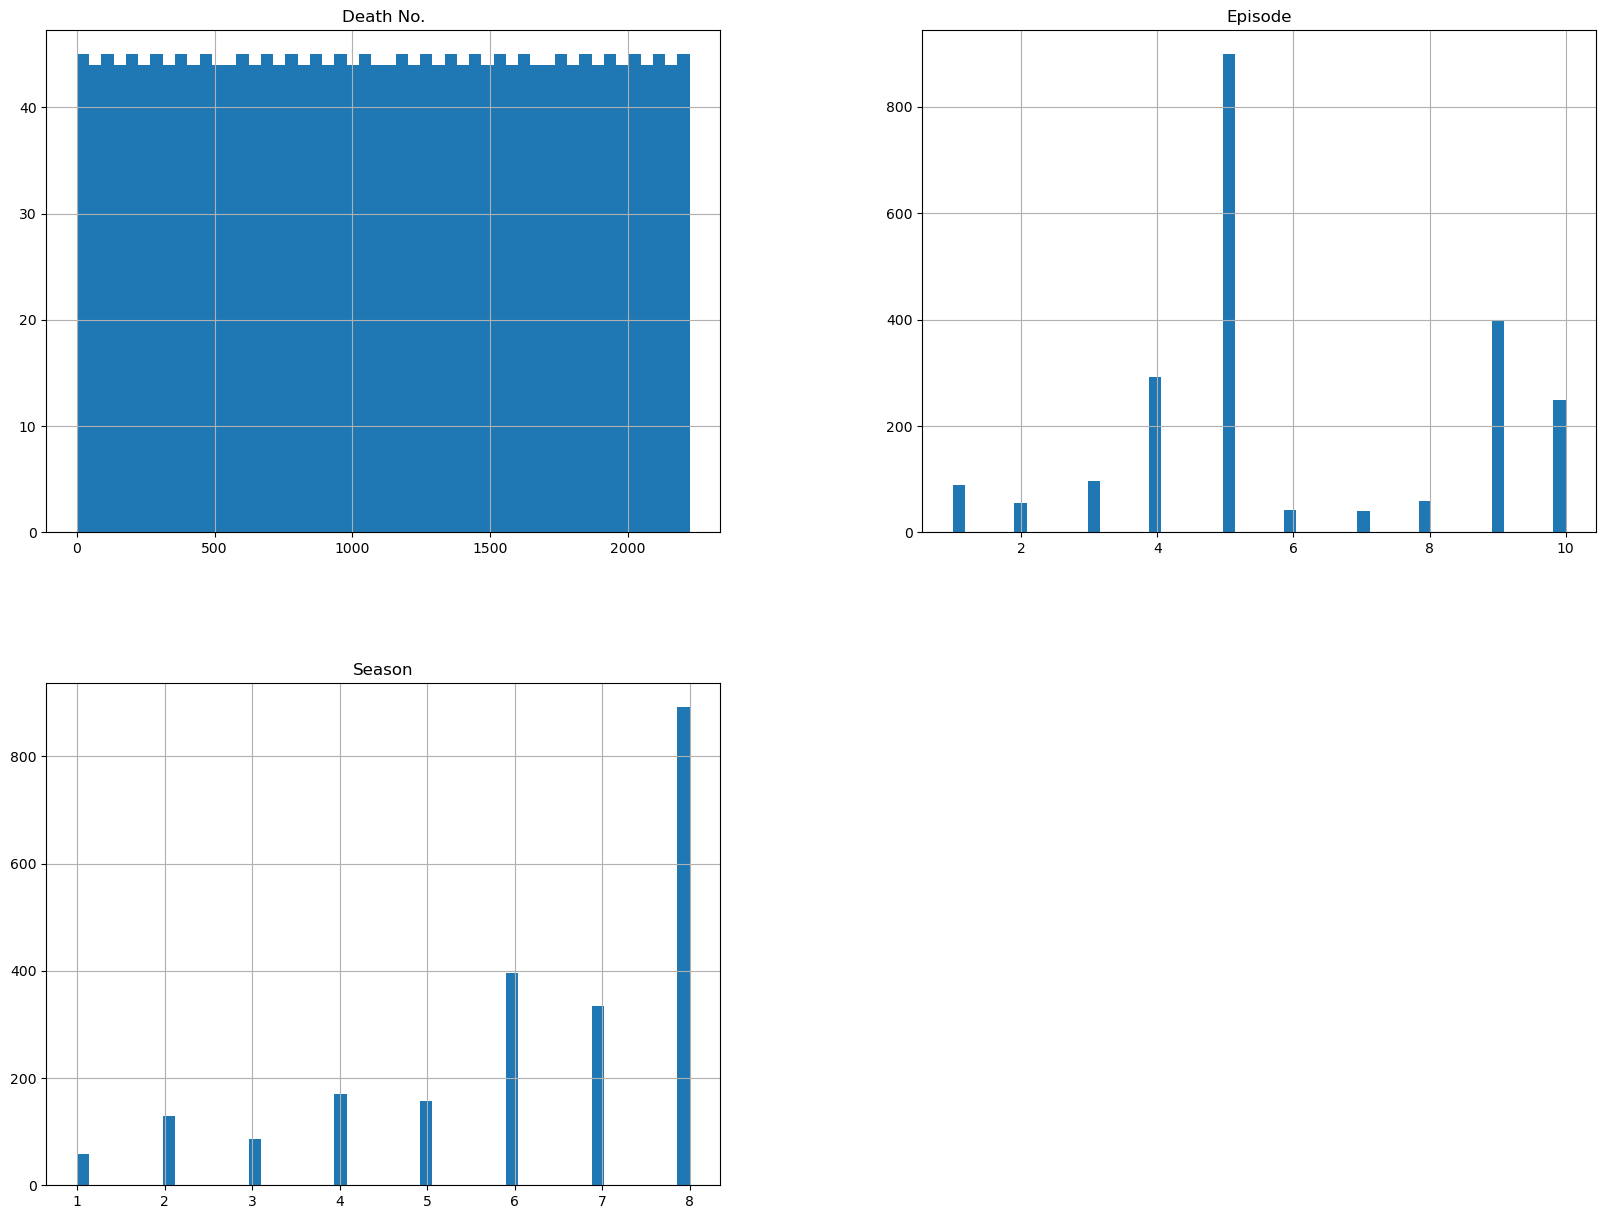

In [18]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

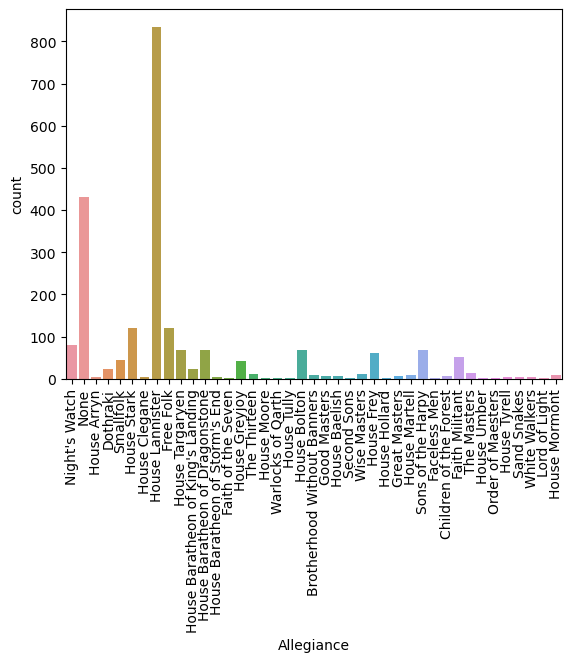

In [23]:
sns.countplot(x='Allegiance', data=df)
plt.xticks(rotation=90)
plt.show()

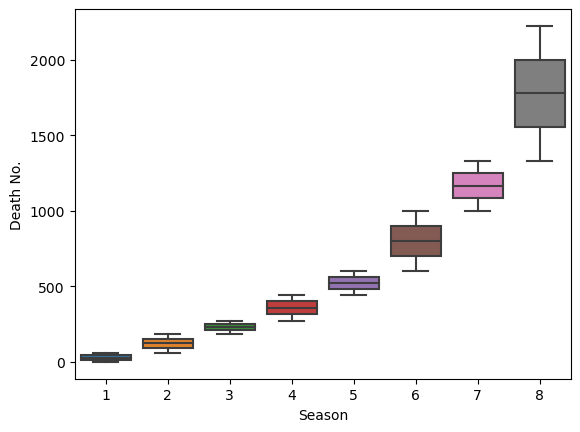

In [24]:
sns.boxplot(x='Season', y='Death No.', data=df)
plt.show()

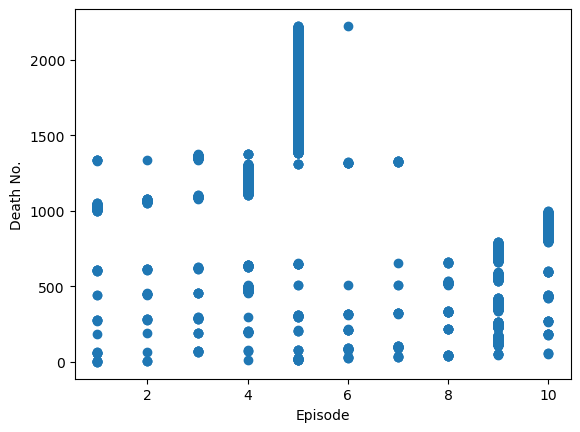

In [25]:
plt.scatter(df['Episode'], df['Death No.'])
plt.xlabel('Episode')
plt.ylabel('Death No.')
plt.show()

In [26]:
# Grouping and aggregation
df_grouped = df.groupby('Season').agg({'Death No.': 'mean'}).reset_index()
print(df_grouped)

   Season  Death No.
0       1       29.5
1       2      123.5
2       3      231.5
3       4      359.5
4       5      523.5
5       6      800.5
6       7     1165.5
7       8     1778.5


In [27]:
# Pivot table
pivot_table = df.pivot_table(index='Season', columns='Allegiance', values='Death No.', aggfunc='sum')
print(pivot_table)

Allegiance  Brotherhood Without Banners  Children of the Forest  Dothraki  \
Season                                                                      
1                                   NaN                     NaN     270.0   
2                                   NaN                     NaN       NaN   
3                                 198.0                     NaN       NaN   
4                                   NaN                     NaN       NaN   
5                                   NaN                     NaN       NaN   
6                                4609.0                  3893.0   10827.0   
7                                1318.0                     NaN       NaN   
8                                1369.0                     NaN       NaN   

Allegiance  Faceless Men  Faith Militant  Faith of the Seven  Free Folk  \
Season                                                                    
1                    NaN             NaN                 NaN       90.0   
2   

Analysis of Deaths by Season and Allegiance

Allegiance  Brotherhood Without Banners  Children of the Forest  Dothraki  \
Season                                                                      
1                                   0.0                     0.0       6.0   
2                                   0.0                     0.0       0.0   
3                                   1.0                     0.0       0.0   
4                                   0.0                     0.0       0.0   
5                                   0.0                     0.0       0.0   
6                                   7.0                     6.0      17.0   
7                                   1.0                     0.0       0.0   
8                                   1.0                     0.0       0.0   

Allegiance  Faceless Men  Faith Militant  Faith of the Seven  Free Folk  \
Season                                                                    
1                    0.0             0.0                 0.0        3.0   
2   

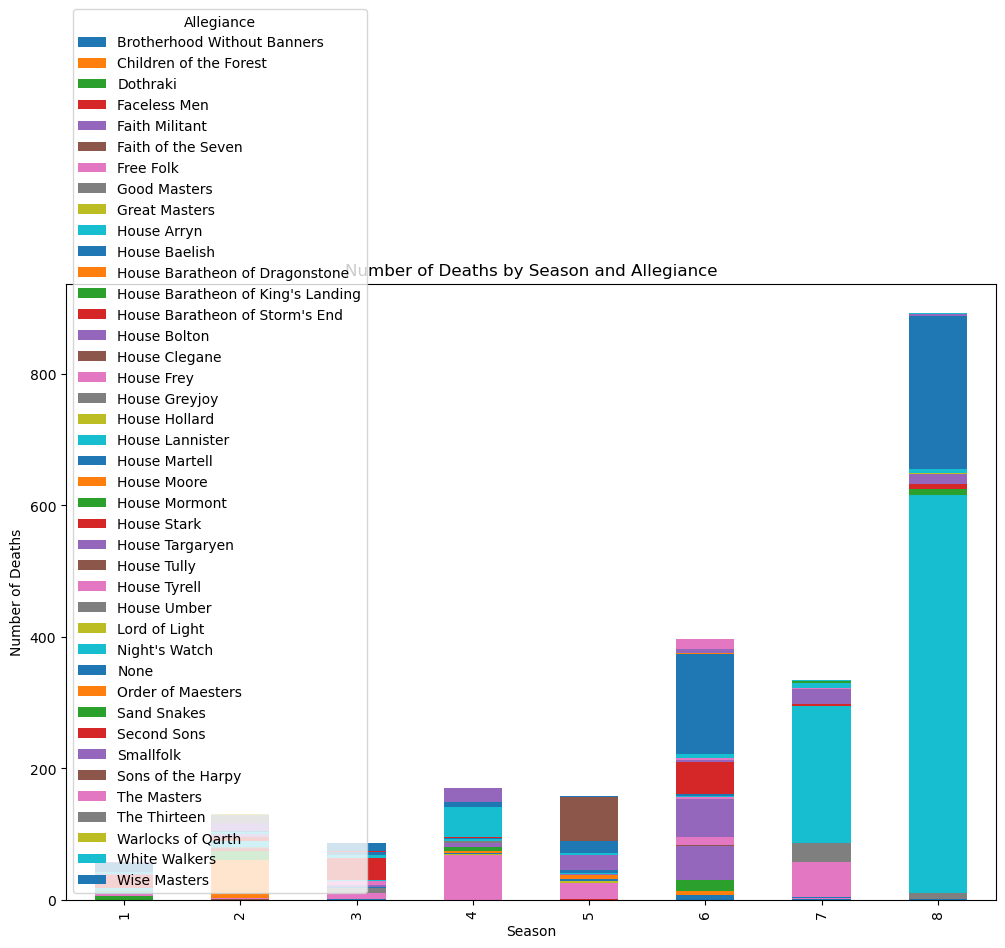

In [28]:
# Number of deaths by season and allegiance
death_by_season_allegiance = df.groupby(['Season', 'Allegiance']).size().unstack().fillna(0)
print(death_by_season_allegiance)

# Visualization
death_by_season_allegiance.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Season')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths by Season and Allegiance')
plt.legend(title='Allegiance')
plt.show()

Most Common Killers

Daenerys Targaryen         1008
Cersei Lannister            199
Arya Stark                   68
Wight                        54
Jon Snow                     51
Bolton soldier               47
Night's Watch brother        41
Stark Soldier                38
Sons of the Harpy agent      38
Grey Worm                    34
Name: Killer, dtype: int64


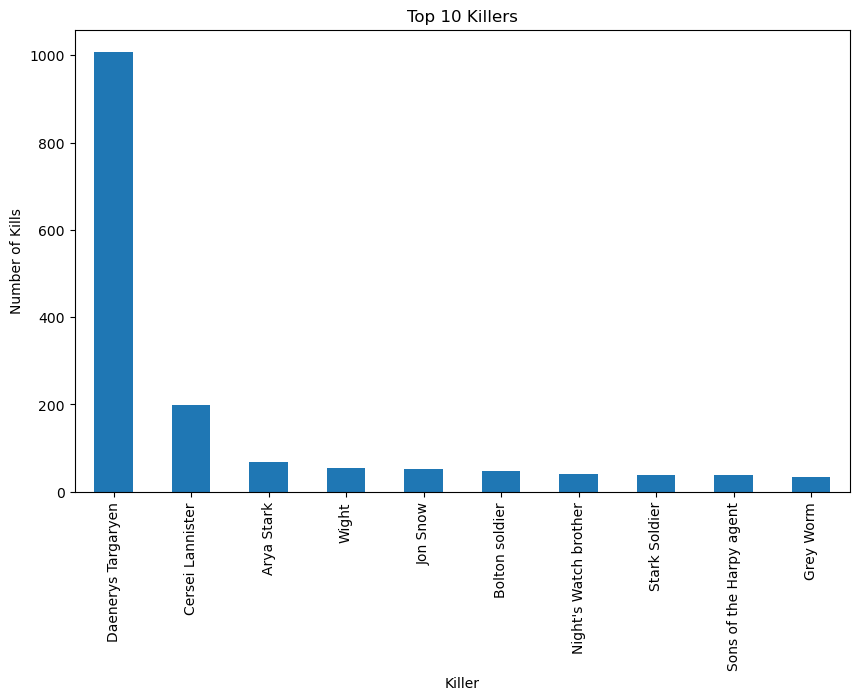

In [29]:
# Top killers
top_killers = df['Killer'].value_counts().head(10)
print(top_killers)

# Visualization
top_killers.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Killer')
plt.ylabel('Number of Kills')
plt.title('Top 10 Killers')
plt.show()

Methods of Killing

Dragonfire (Dragon)    986
Sword                  322
Wildfire               210
Knife                  119
Arrow                   95
Spear                   81
Poison                  63
Axe                     48
Arakh                   44
Flaming arrow           35
Name: Method, dtype: int64


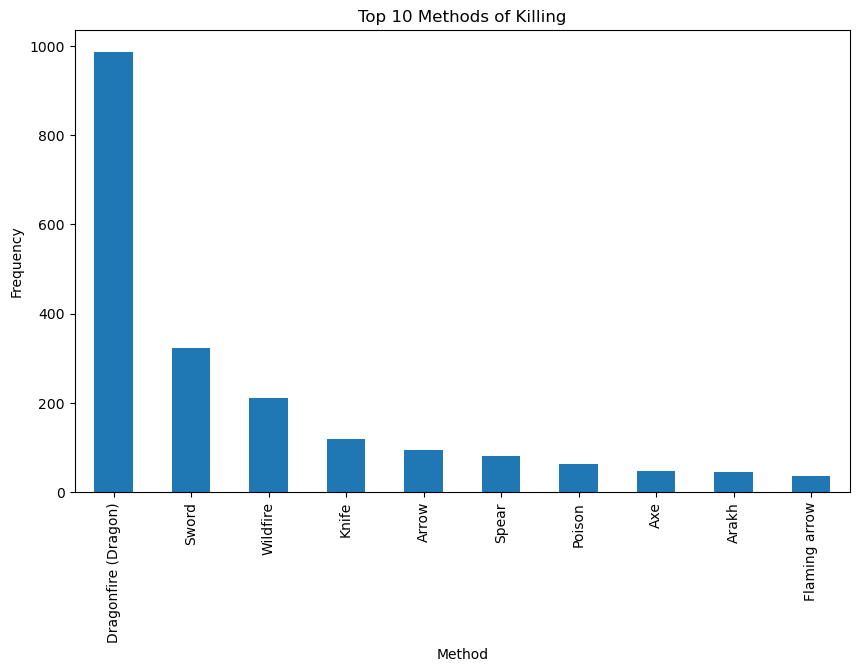

In [30]:
# Common methods of killing
common_methods = df['Method'].value_counts().head(10)
print(common_methods)

# Visualization
common_methods.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Method')
plt.ylabel('Frequency')
plt.title('Top 10 Methods of Killing')
plt.show()

Analysis of Deaths Over Time (Episodes)

Episode    1     2     3      4      5     6     7     8      9      10
Season                                                                 
1         7.0   3.0   0.0    1.0   17.0   5.0   5.0  11.0    6.0    3.0
2         7.0   1.0   8.0    3.0    4.0  12.0  15.0   0.0   72.0    8.0
3         1.0   1.0   4.0   11.0    4.0   7.0   0.0   6.0   45.0    7.0
4         5.0   6.0  11.0    1.0   16.0   7.0   7.0  12.0   86.0   19.0
5         2.0   8.0   5.0   48.0    2.0   1.0   2.0  23.0   58.0    9.0
6         8.0   7.0  10.0   18.0    8.0   0.0   1.0   8.0  133.0  203.0
7        54.0  29.0  23.0  205.0    4.0   9.0  10.0   0.0    0.0    0.0
8         6.0   1.0  35.0    5.0  844.0   1.0   0.0   0.0    0.0    0.0


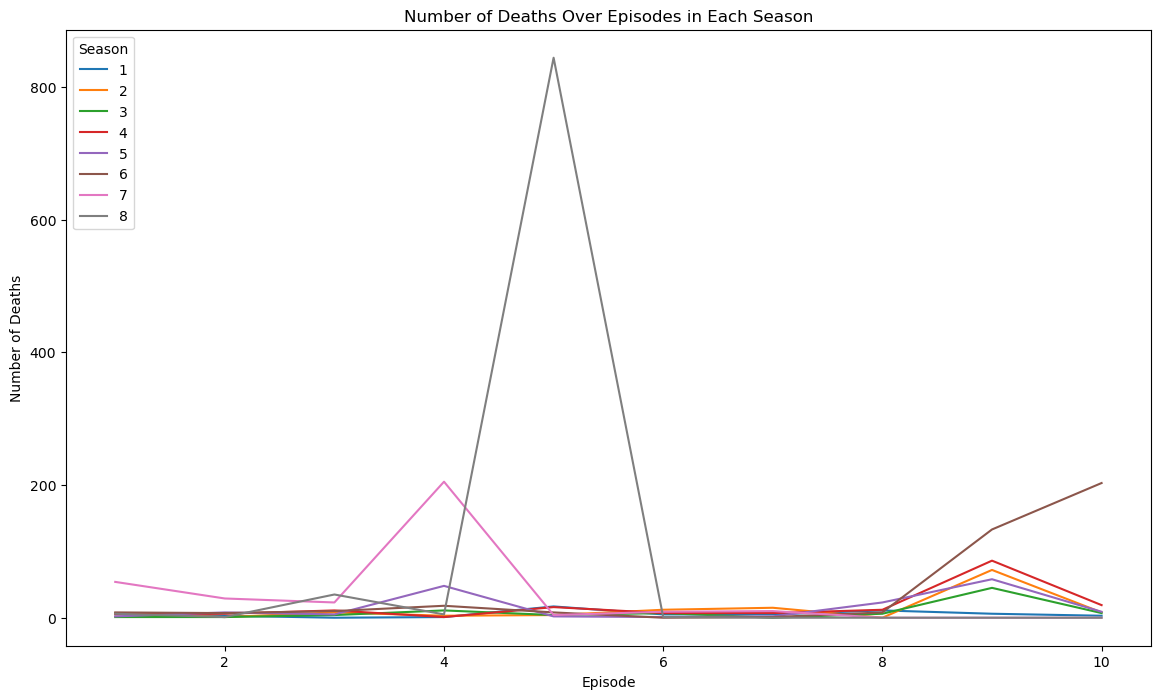

In [31]:
# Deaths by episode in each season
deaths_by_episode = df.groupby(['Season', 'Episode']).size().unstack().fillna(0)
print(deaths_by_episode)

# Visualization
deaths_by_episode.T.plot(kind='line', figsize=(14, 8))
plt.xlabel('Episode')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths Over Episodes in Each Season')
plt.legend(title='Season', loc='upper left')
plt.show()

Deaths by Location

King's Landing     1170
Roseroad            207
Winterfell          169
Meereen             136
The Twins            89
Beyond the Wall      78
Castle Black         66
The Narrow Sea       35
Riverlands           28
The Wall             26
Name: Location, dtype: int64


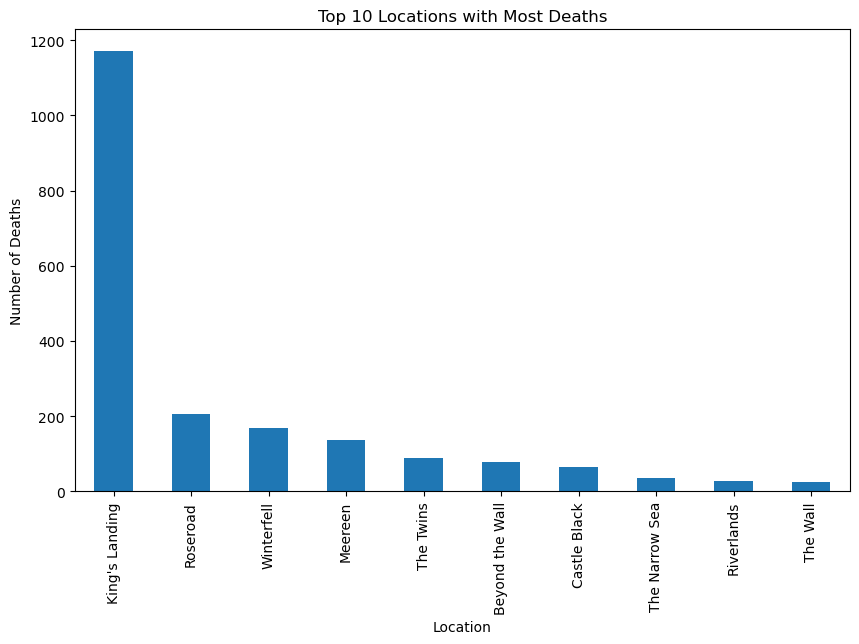

In [32]:
# Top locations for deaths
top_locations = df['Location'].value_counts().head(10)
print(top_locations)

# Visualization
top_locations.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Location')
plt.ylabel('Number of Deaths')
plt.title('Top 10 Locations with Most Deaths')
plt.show()

Relationships Between Killers and Victims

Allegiance       Brotherhood Without Banners  Children of the Forest  \
Killer                                                                 
Accident                                 0.0                     0.0   
Aemon Targaryen                          0.0                     0.0   
Alliser Thorne                           0.0                     0.0   
Amory Lorch                              0.0                     0.0   
Arthur Dayne                             0.0                     0.0   
...                                      ...                     ...   
Wildling giant                           0.0                     0.0   
Wun Wun                                  0.0                     0.0   
Yara Greyjoy                             0.0                     0.0   
Ygritte                                  0.0                     0.0   
Yoren                                    0.0                     0.0   

Allegiance       Dothraki  Faceless Men  Faith Militant  Faith 

ValueError: Unknown format code 'd' for object of type 'float'

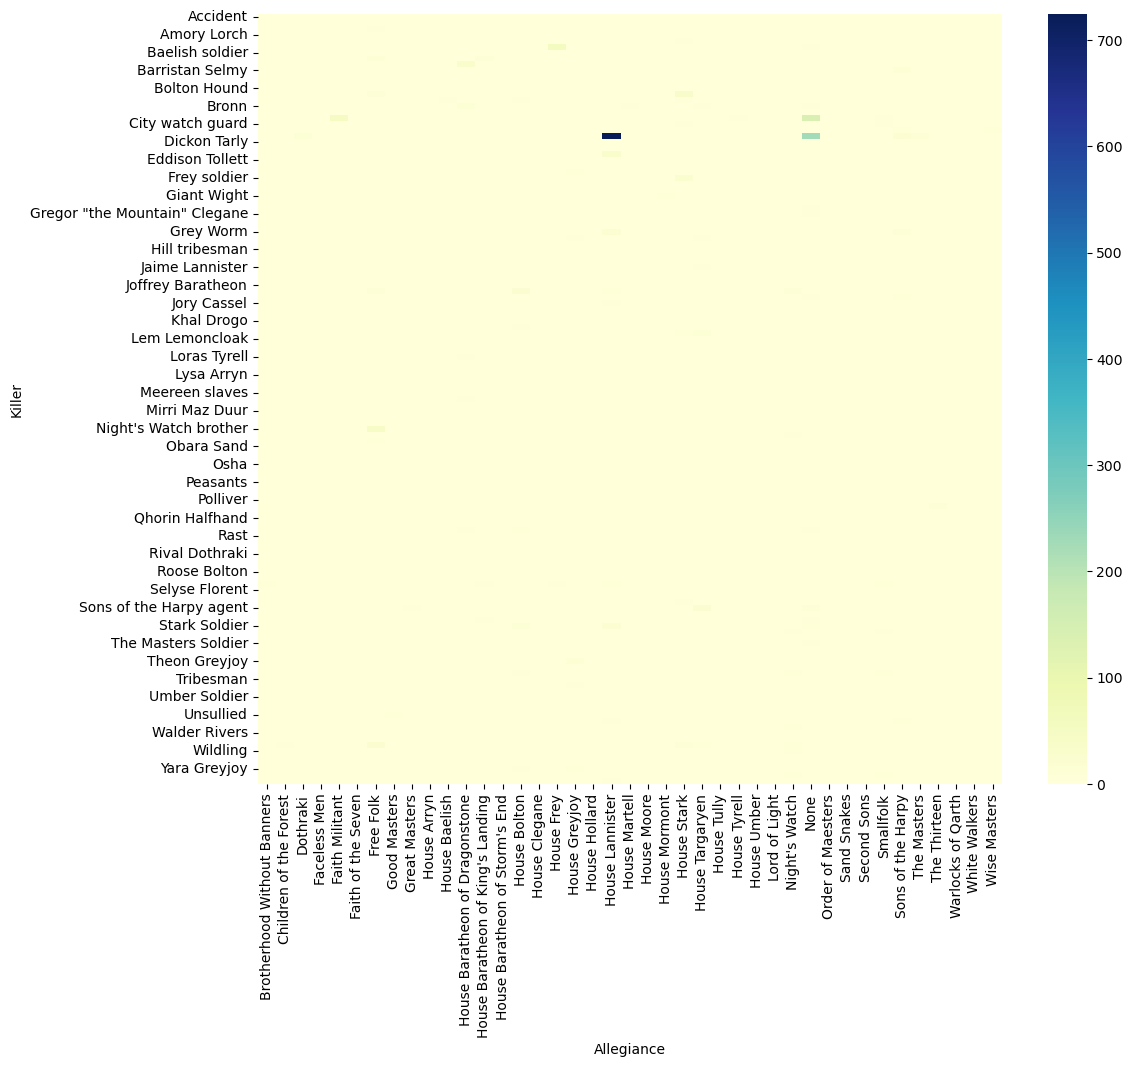

In [33]:
# Killers vs Victims' Allegiance
killer_vs_allegiance = df.groupby(['Killer', 'Allegiance']).size().unstack().fillna(0)
print(killer_vs_allegiance)

# Heatmap Visualization
plt.figure(figsize=(12, 10))
sns.heatmap(killer_vs_allegiance, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Killers vs Victims\' Allegiance')
plt.show()

Time Series Analysis

Episode
1      90
2      56
3      96
4     292
5     899
6      42
7      40
8      60
9     400
10    249
Name: Death No., dtype: int64


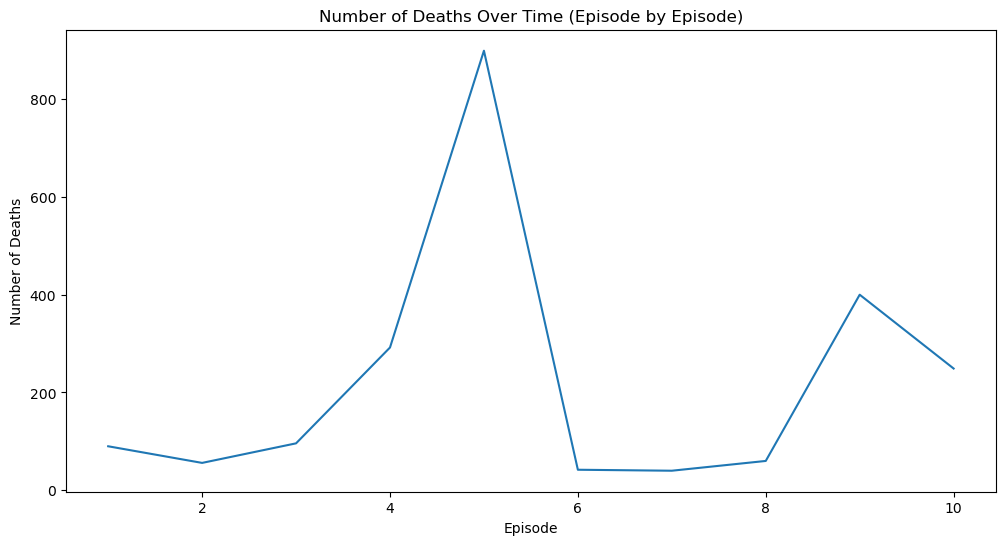

In [34]:
# Deaths over time by episode
deaths_over_time = df.groupby('Episode')['Death No.'].count()
print(deaths_over_time)

# Time Series Visualization
plt.figure(figsize=(12, 6))
deaths_over_time.plot(kind='line')
plt.xlabel('Episode')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths Over Time (Episode by Episode)')
plt.show()

Proportion of Deaths by Allegiance in Each Season

C:\Users\karth\AppData\Local\Temp\ipykernel_4484\3157305438.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  deaths_proportion = df.groupby(['Season', 'Allegiance']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().fillna(0)


Allegiance  Brotherhood Without Banners  Children of the Forest   Dothraki  \
Season                                                                       
1                              0.000000                0.000000  10.344828   
2                              0.000000                0.000000   0.000000   
3                              1.162791                0.000000   0.000000   
4                              0.000000                0.000000   0.000000   
5                              0.000000                0.000000   0.000000   
6                              1.767677                1.515152   4.292929   
7                              0.299401                0.000000   0.000000   
8                              0.112108                0.000000   0.000000   

Allegiance  Faceless Men  Faith Militant  Faith of the Seven  Free Folk  \
Season                                                                    
1               0.000000        0.000000            0.000000   5.1724

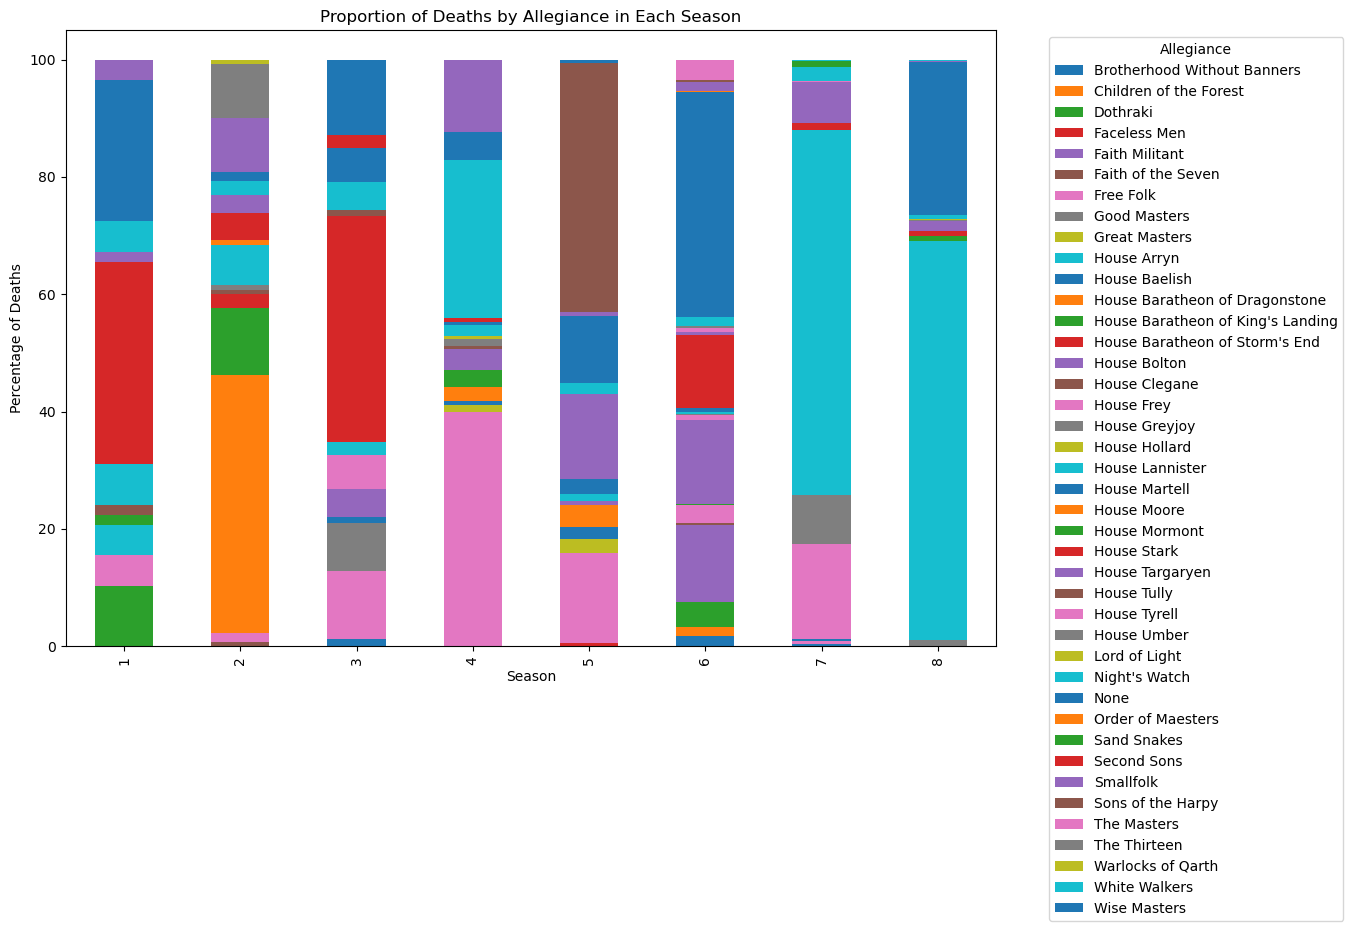

In [35]:
# Proportion of deaths by allegiance in each season
deaths_proportion = df.groupby(['Season', 'Allegiance']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().fillna(0)
print(deaths_proportion)

# Stacked Bar Plot
deaths_proportion.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Season')
plt.ylabel('Percentage of Deaths')
plt.title('Proportion of Deaths by Allegiance in Each Season')
plt.legend(title='Allegiance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Survival Analysis

Allegiance
Brotherhood Without Banners          1.0
Children of the Forest               1.0
Dothraki                             1.0
Faceless Men                         1.0
Faith Militant                       1.0
Faith of the Seven                   1.0
Free Folk                            1.0
Good Masters                         1.0
Great Masters                        1.0
House Arryn                          1.0
House Baelish                        1.0
House Baratheon of Dragonstone       1.0
House Baratheon of King's Landing    1.0
House Baratheon of Storm's End       1.0
House Bolton                         1.0
House Clegane                        1.0
House Frey                           1.0
House Greyjoy                        1.0
House Hollard                        1.0
House Lannister                      1.0
House Martell                        1.0
House Moore                          1.0
House Mormont                        1.0
House Stark                          1.0
House

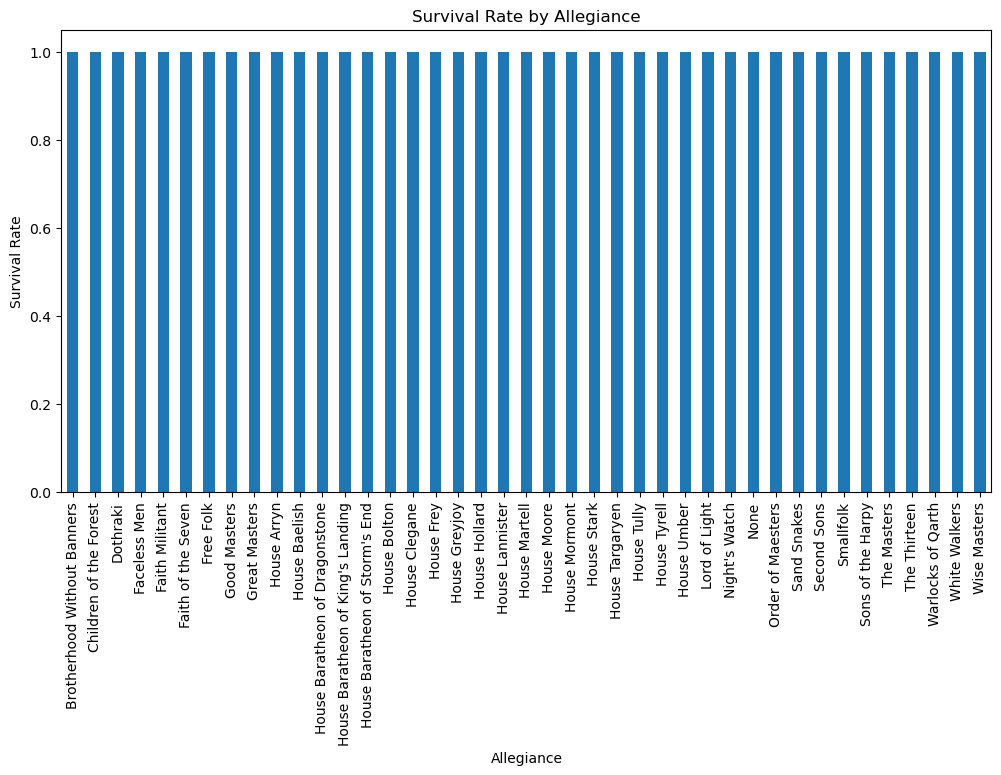

In [36]:
# Add a column for survival status (1 if dead, 0 if alive)
df['Survival_Status'] = df['Death No.'].apply(lambda x: 1 if pd.notnull(x) else 0)

# Survival rate by allegiance
survival_rate_by_allegiance = df.groupby('Allegiance')['Survival_Status'].mean()
print(survival_rate_by_allegiance)

# Visualization
survival_rate_by_allegiance.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Allegiance')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Allegiance')
plt.show()

Network Analysis of Killers and Victims

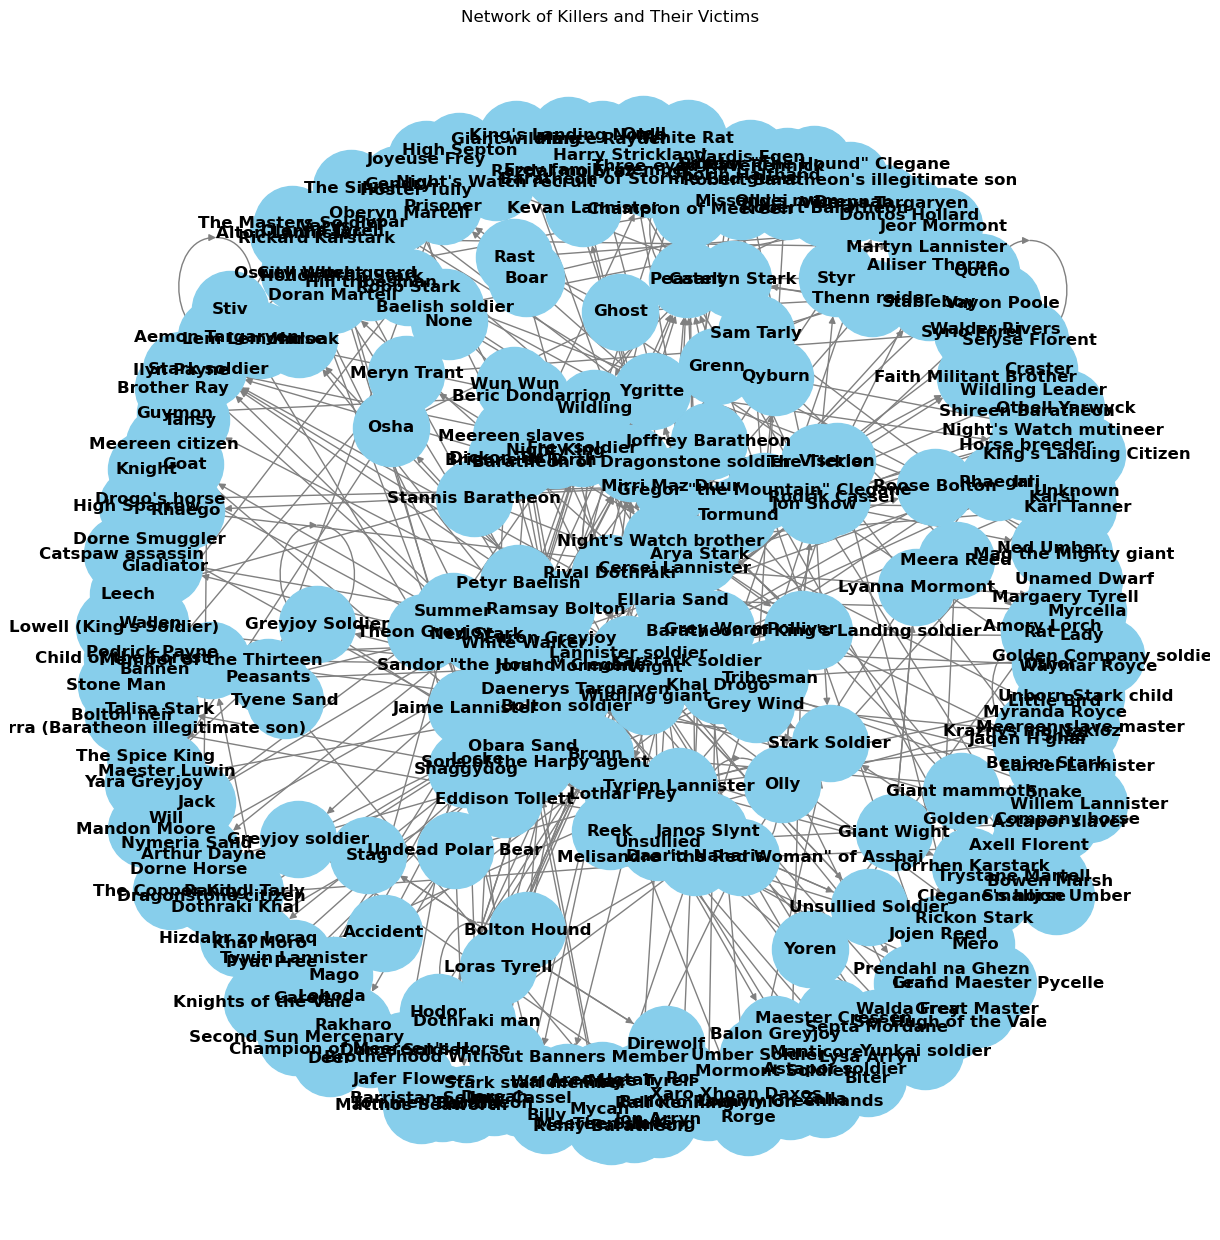

In [37]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add edges from killer to victim
edges = df[['Killer', 'Name']].dropna().values.tolist()
G.add_edges_from(edges)

# Plot the network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_color="black", font_weight="bold", edge_color="gray")
plt.title('Network of Killers and Their Victims')
plt.show()